## Import packges

In [1]:
# Packages

# Data Processing
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 200
import seaborn as sns

# For Ignoring Warning
import warnings

# Statistics
import math
from scipy import stats
from scipy.stats import norm

# File Path
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/electricity-data/Electrecity_data.csv


In [2]:
df_electricity = pd.read_csv("/kaggle/input/electricity-data/Electrecity_data.csv")
df_electricity.head()

,Country,Features,Region,1980,1981,1982,1983,1984,1985,1986,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Algeria,net generation,Africa,6.683,7.65,8.824,9.615,10.537,11.569,12.214,...,53.9845,56.3134,60.39972,64.68244,66.75504,71.49546,72.10903,76.685,72.73591277,77.53072719
1,Angola,net generation,Africa,0.905,0.906,0.995,1.028,1.028,1.028,1.088,...,6.03408,7.97606,9.21666,9.30914,10.203511,10.67604,12.83194,15.4,16.6,16.429392
2,Benin,net generation,Africa,0.005,0.005,0.005,0.005,0.005,0.005,0.005,...,0.04612,0.08848,0.22666,0.31056,0.26004,0.3115,0.19028,0.2017,0.22608,0.24109728
3,Botswana,net generation,Africa,0.443,0.502,0.489,0.434,0.445,0.456,0.538,...,0.33,0.86868,2.17628,2.79104,2.52984,2.8438,2.97076,3.0469,2.05144,2.18234816
4,Burkina Faso,net generation,Africa,0.098,0.108,0.115,0.117,0.113,0.115,0.122,...,0.86834,0.98268,1.11808,1.43986,1.5509,1.64602,1.6464,1.72552,1.647133174,1.761209666


# 1. Overview

In [3]:
df_electricity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1610 entries, 0 to 1609
Data columns (total 45 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Country   1610 non-null   object
 1   Features  1610 non-null   object
 2   Region    1610 non-null   object
 3   1980      1582 non-null   object
 4   1981      1582 non-null   object
 5   1982      1582 non-null   object
 6   1983      1582 non-null   object
 7   1984      1582 non-null   object
 8   1985      1582 non-null   object
 9   1986      1582 non-null   object
 10  1987      1582 non-null   object
 11  1988      1582 non-null   object
 12  1989      1582 non-null   object
 13  1990      1582 non-null   object
 14  1991      1582 non-null   object
 15  1992      1582 non-null   object
 16  1993      1582 non-null   object
 17  1994      1582 non-null   object
 18  1995      1582 non-null   object
 19  1996      1582 non-null   object
 20  1997      1582 non-null   object
 21  1998      1582

In [4]:
# missing values
df_electricity.isnull().sum()

Country      0
Features     0
Region       0
1980        28
1981        28
1982        28
1983        28
1984        28
1985        28
1986        28
1987        28
1988        28
1989        28
1990        28
1991        28
1992        28
1993        28
1994        28
1995        28
1996        28
1997        28
1998        28
1999        28
2000        28
2001        28
2002        28
2003        28
2004        28
2005        28
2006        28
2007        28
2008        28
2009        28
2010        28
2011        28
2012        28
2013        28
2014        28
2015        28
2016        28
2017        28
2018        28
2019        28
2020        31
2021        26
dtype: int64

In [5]:
# remove countries that contains missing values
df_electricity['Country'] = df_electricity['Country'].str.strip()
df_electricity = df_electricity[-df_electricity['Country'].isin([
    'Micronesia', 'Northern Mariana Islands', 'Tuvalu', 'U.S. Territories', 'Reunion', 'French Guiana', 'Guadeloupe', 'Martinique'
])]

# check
df_electricity.isnull().sum()

Country     0
Features    0
Region      0
1980        0
1981        0
1982        0
1983        0
1984        0
1985        0
1986        0
1987        0
1988        0
1989        0
1990        0
1991        0
1992        0
1993        0
1994        0
1995        0
1996        0
1997        0
1998        0
1999        0
2000        0
2001        0
2002        0
2003        0
2004        0
2005        0
2006        0
2007        0
2008        0
2009        0
2010        0
2011        0
2012        0
2013        0
2014        0
2015        0
2016        0
2017        0
2018        0
2019        0
2020        0
2021        0
dtype: int64

In this dataset, the '--' notation is considered to represent missing values.

In [6]:
# remove "--"
for year in range(1980, 2022):
    df_electricity = df_electricity[-df_electricity[str(year)].isin(["--"])]

# 2. Data Transformation

In [7]:
# melt
df_electricity = df_electricity.melt(id_vars = ['Country', 'Features', 'Region'], var_name = 'Year', value_name = 'Value')
df_electricity.head()

,Country,Features,Region,Year,Value
0,Algeria,net generation,Africa,1980,6.683
1,Angola,net generation,Africa,1980,0.905
2,Benin,net generation,Africa,1980,0.005
3,Botswana,net generation,Africa,1980,0.443
4,Burkina Faso,net generation,Africa,1980,0.098


In [8]:
# setting data type
df_electricity['Year'] = df_electricity['Year'].astype('int')
df_electricity['Value'] = df_electricity['Value'].astype('float')

# check
df_electricity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54096 entries, 0 to 54095
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Country   54096 non-null  object 
 1   Features  54096 non-null  object 
 2   Region    54096 non-null  object 
 3   Year      54096 non-null  int64  
 4   Value     54096 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 2.1+ MB


In [9]:
# pivot
df_electricity['Features'] = df_electricity['Features'].str.strip()
df_electricity = df_electricity.pivot_table(values = 'Value', index = ['Country', 'Region', 'Year'], columns = 'Features')
df_electricity.reset_index(inplace = True)

# check
df_electricity.head()

Features,Country,Region,Year,distribution losses,exports,imports,installed capacity,net consumption,net generation,net imports
0,Afghanistan,Asia & Oceania,1980,0.06594,0.0,0.0,0.374,0.87606,0.942,0.0
1,Afghanistan,Asia & Oceania,1981,0.06944,0.0,0.0,0.427,0.92256,0.992,0.0
2,Afghanistan,Asia & Oceania,1982,0.06664,0.0,0.0,0.427,0.88536,0.952,0.0
3,Afghanistan,Asia & Oceania,1983,0.07000,0.0,0.0,0.450,0.93000,1.000,0.0
4,Afghanistan,Asia & Oceania,1984,0.07133,0.0,0.0,0.450,0.94767,1.019,0.0


# 3. EDA

## 3.1. Correlation

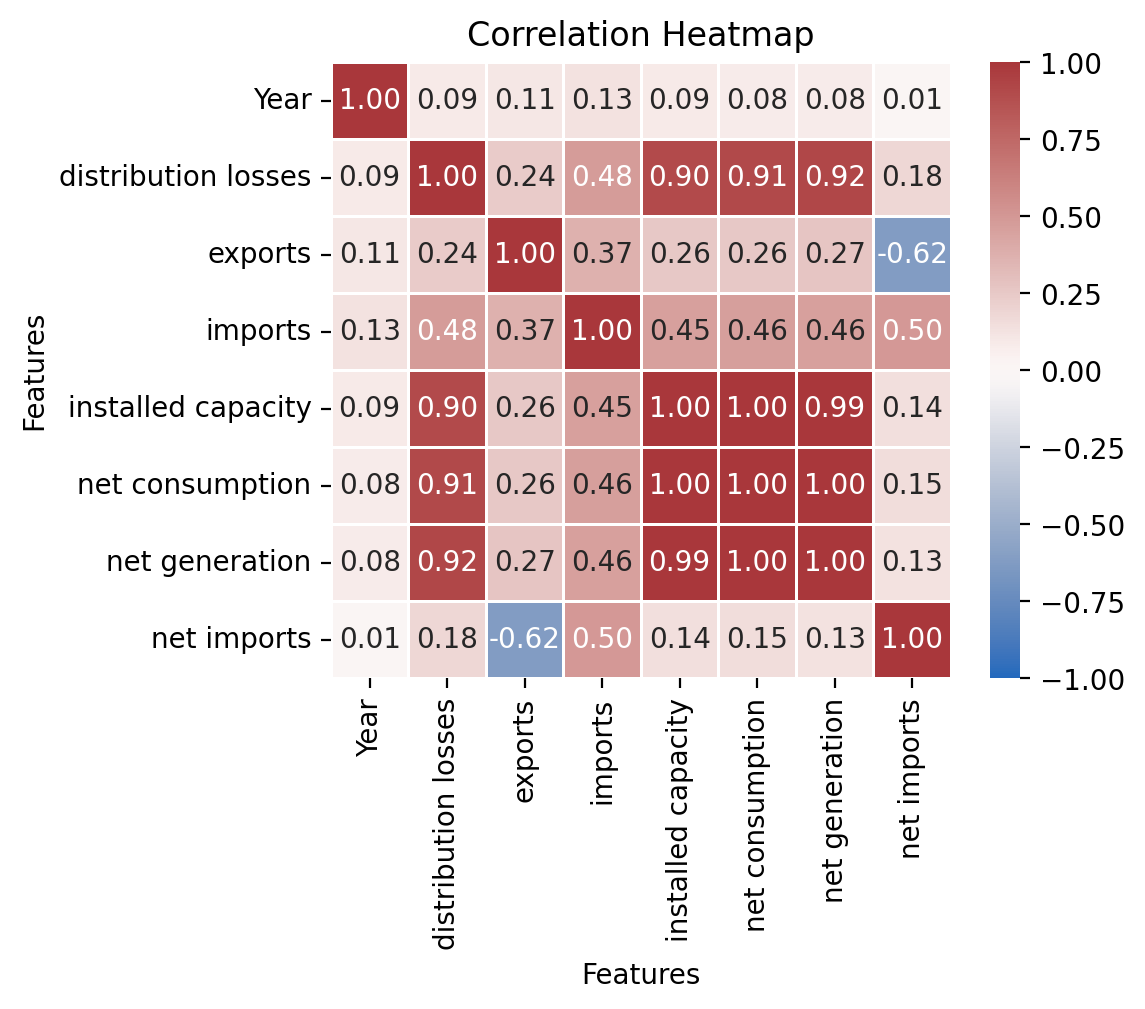

In [10]:
# correlation matrix
plt.figure(figsize = (5, 4), facecolor = "white")

# plotting
sns.heatmap(
    data = df_electricity.corr(numeric_only = True),
    cmap = "vlag",
    vmin = -1, vmax = 1,
    linecolor = "white", linewidth = 0.5,
    annot = True,
    fmt = ".2f"
)

plt.title('Correlation Heatmap')
plt.show()

## 3.2. Distribution(Numerical)

In [11]:
def summary_numerical_dist(df_data, col, q_min, q_max):
    
    # plot size
    fig = plt.figure(figsize = (10, 8), facecolor = "white")


    # setting subplot
    layout_plot = (2, 2)
    num_subplot = 4
    axes = [None for _ in range(num_subplot)]

    list_shape_subplot = [
        [(0, 0), (0, 1), (1, 0), (1, 1)], # loc
        [1, 1, 1, 1], # rowspan
        [1, 1, 1, 1] # colspan
    ]

    for i in range(num_subplot):
        axes[i] = plt.subplot2grid(
            layout_plot, list_shape_subplot[0][i],
            rowspan = list_shape_subplot[1][i],
            colspan = list_shape_subplot[2][i]
        )

    
    # histplot: axes[0]
    sns.histplot(
        data = df_data,
        x = col,
        kde = True,
        ax = axes[0]
    )
    
    
    # QQ plot: axes[1]
    stats.probplot(
        x = df_data[col],
        dist = stats.norm,
        plot = axes[1]
    )
    
    
    # boxplot, to detect outlier: axes[2]
    sns.boxplot(
        data = df_data,
        x = col,
        ax = axes[2]
    )
    
    
    # lineplot, to detect outlier: axes[3]
    pts = df_data[col].quantile(q = np.arange(q_min, q_max, 0.01))
    sns.lineplot(
        x = pts.index,
        y = pts,
        ax = axes[3]
    )
    axes[3].grid(True)
    
    
    # lists
    list_title = ["Histogram", "QQ plot", "Boxplot", "Outlier"]
    
    for i in range(num_subplot):
        # title
        axes[i].set_title(list_title[i])
        
    
    # suptitle
    plt.suptitle(f"Distribution of: {col}", fontsize = 15)
    
    
    # interval adjustment and output
    plt.tight_layout()
    plt.show()

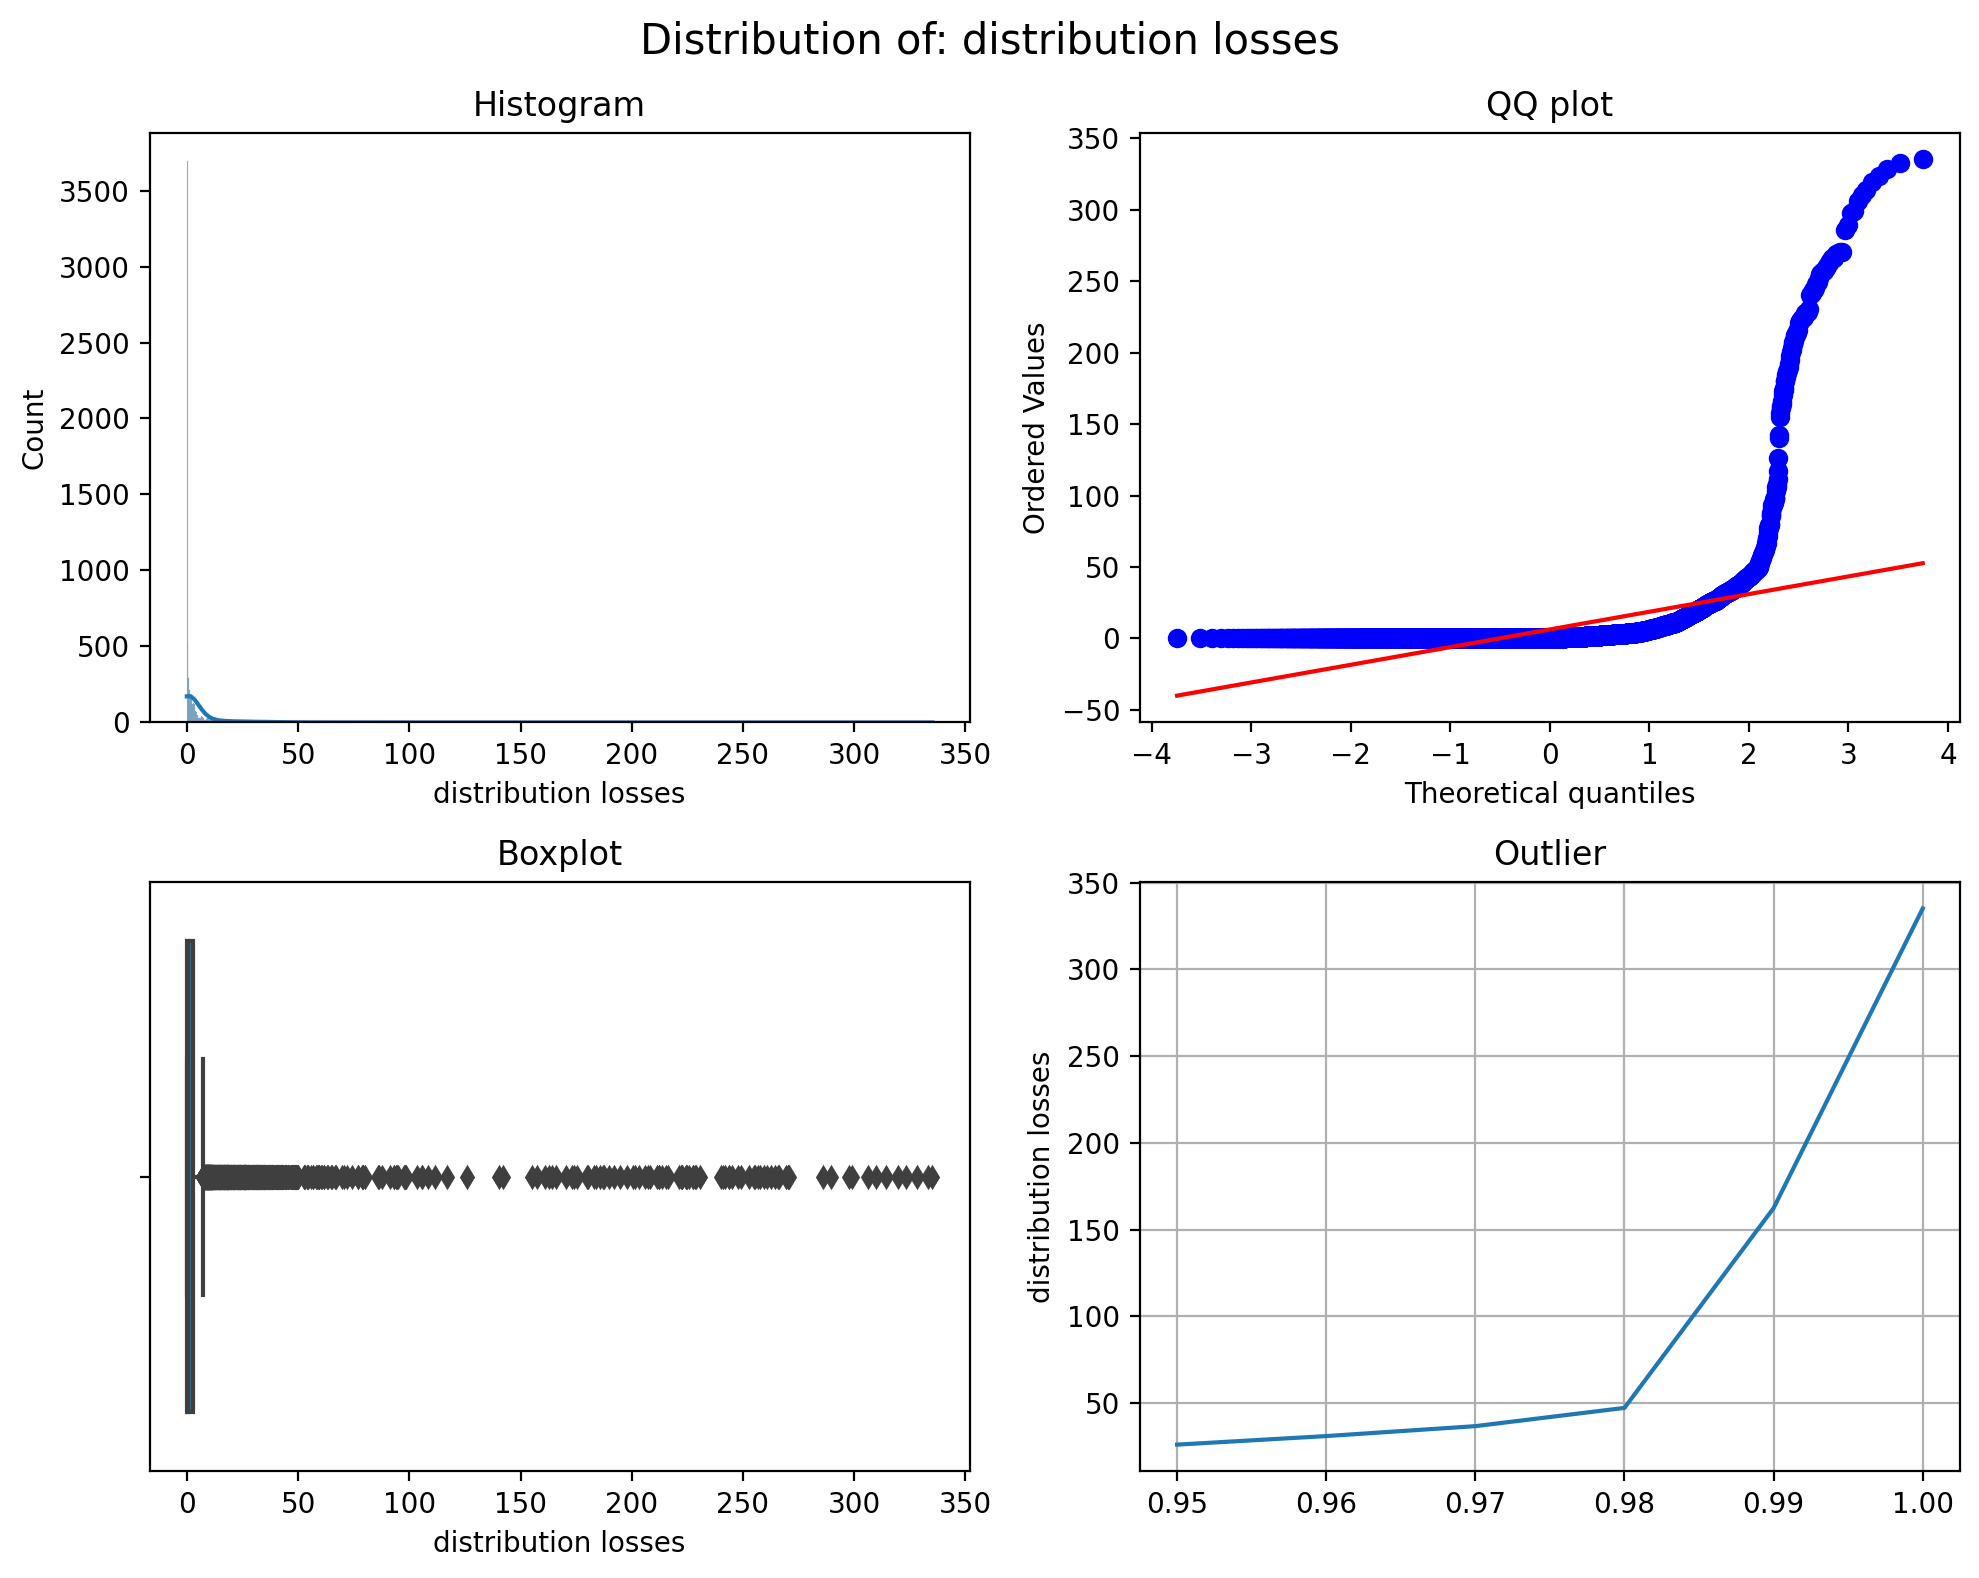

In [12]:
summary_numerical_dist(df_electricity, 'distribution losses', 0.95, 1)

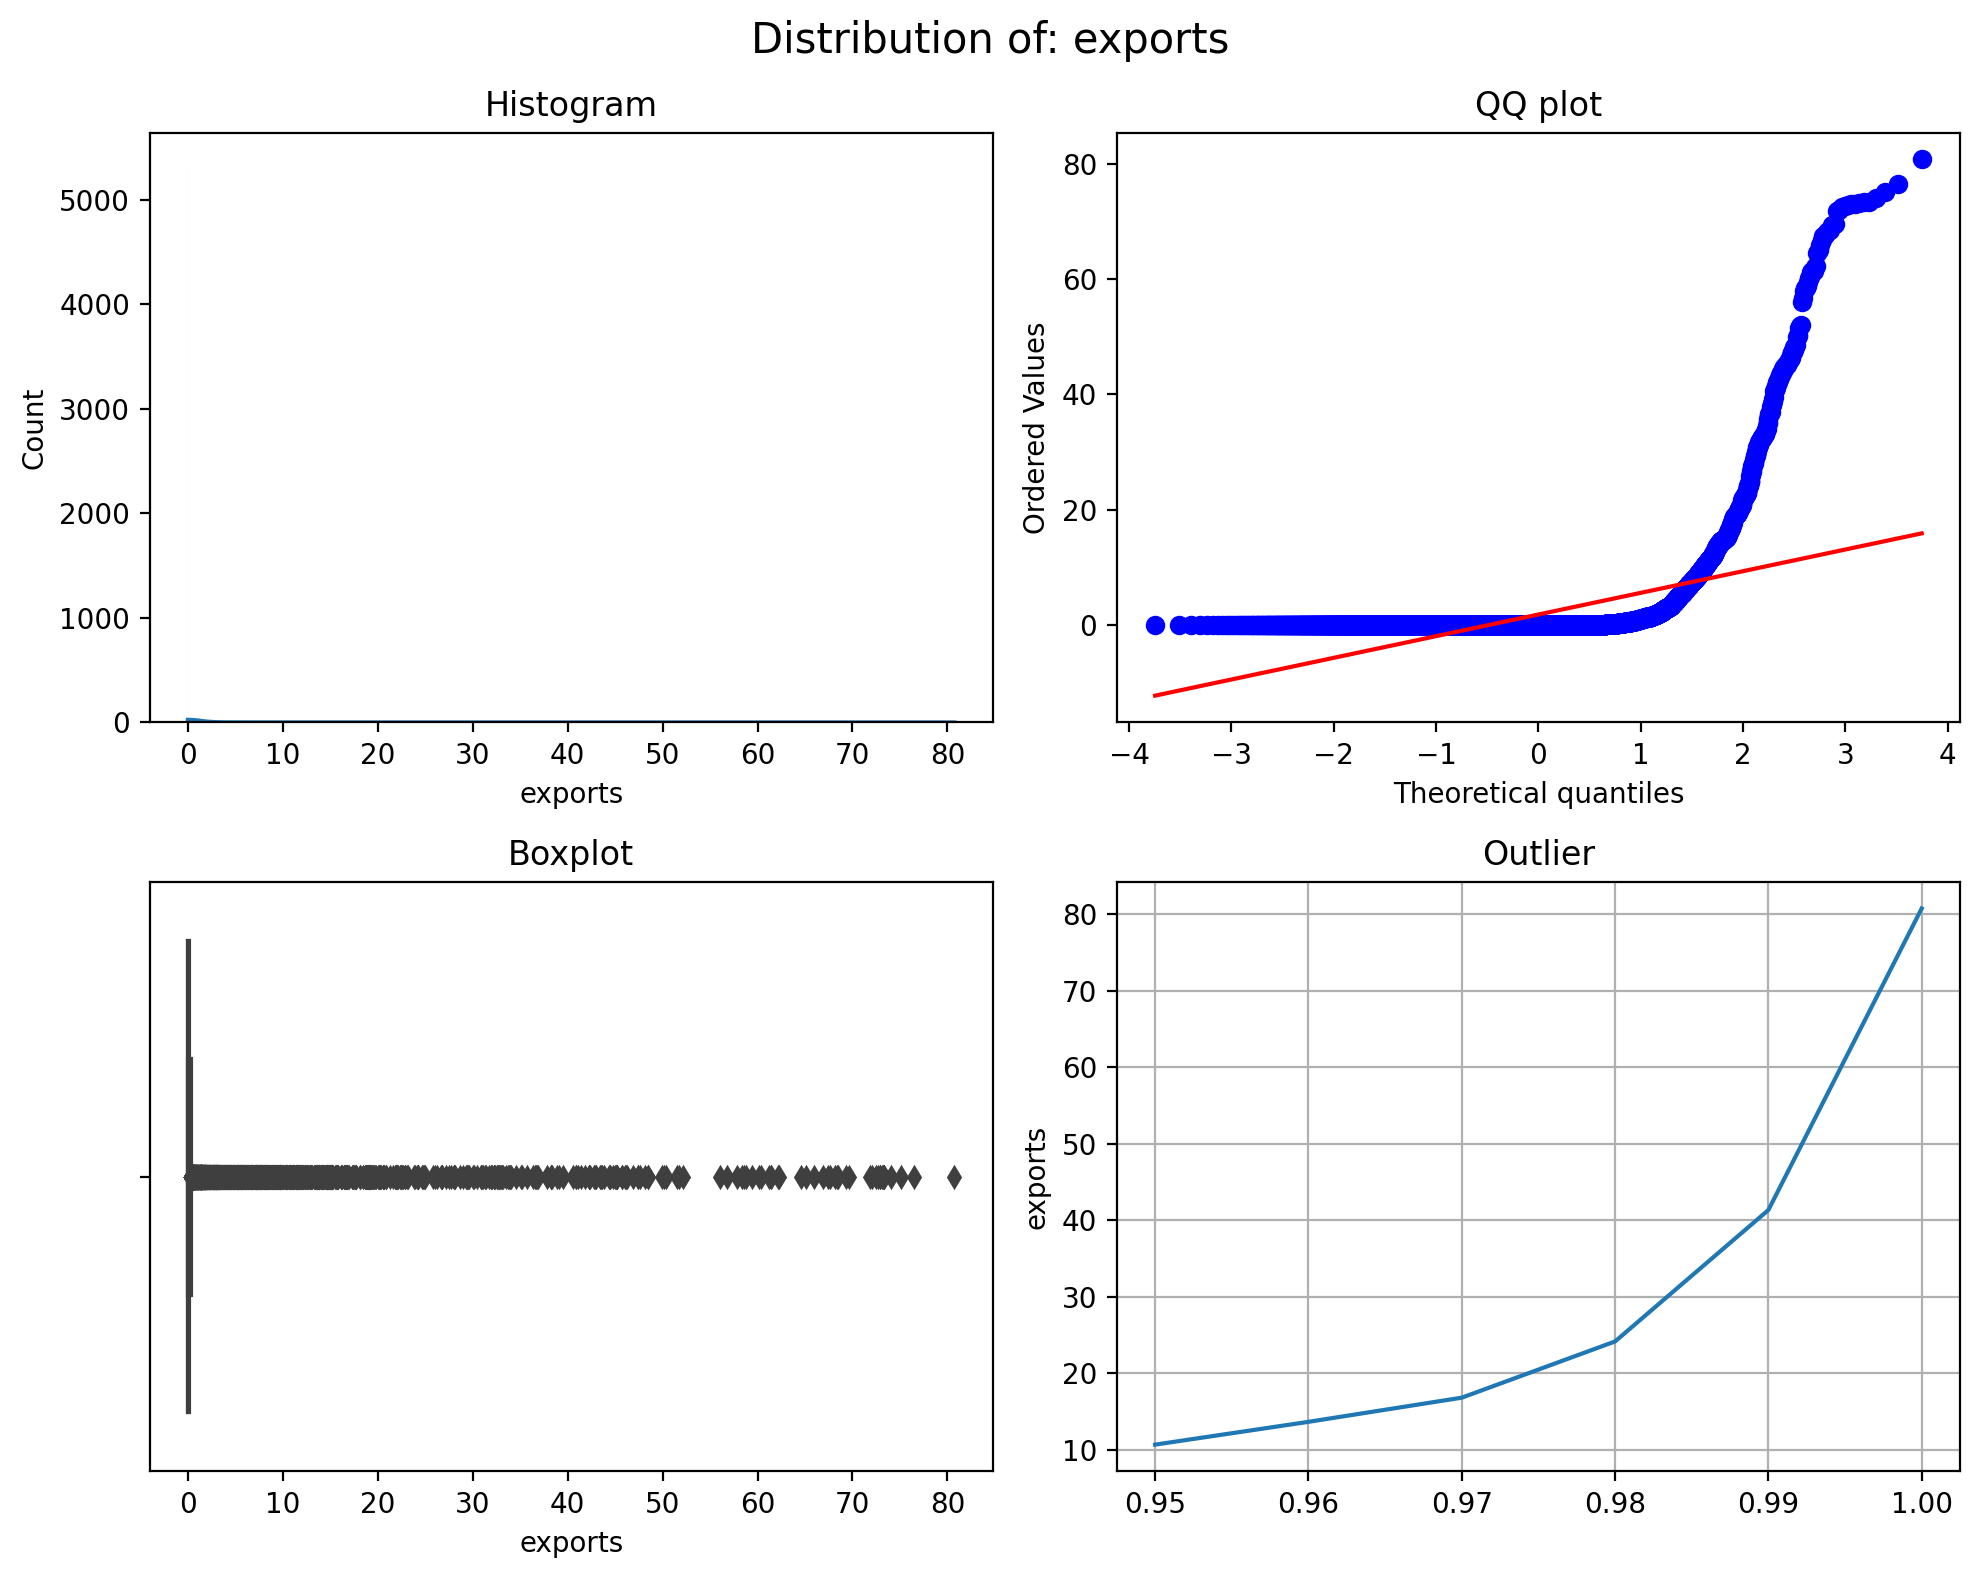

In [13]:
summary_numerical_dist(df_electricity, 'exports', 0.95, 1)

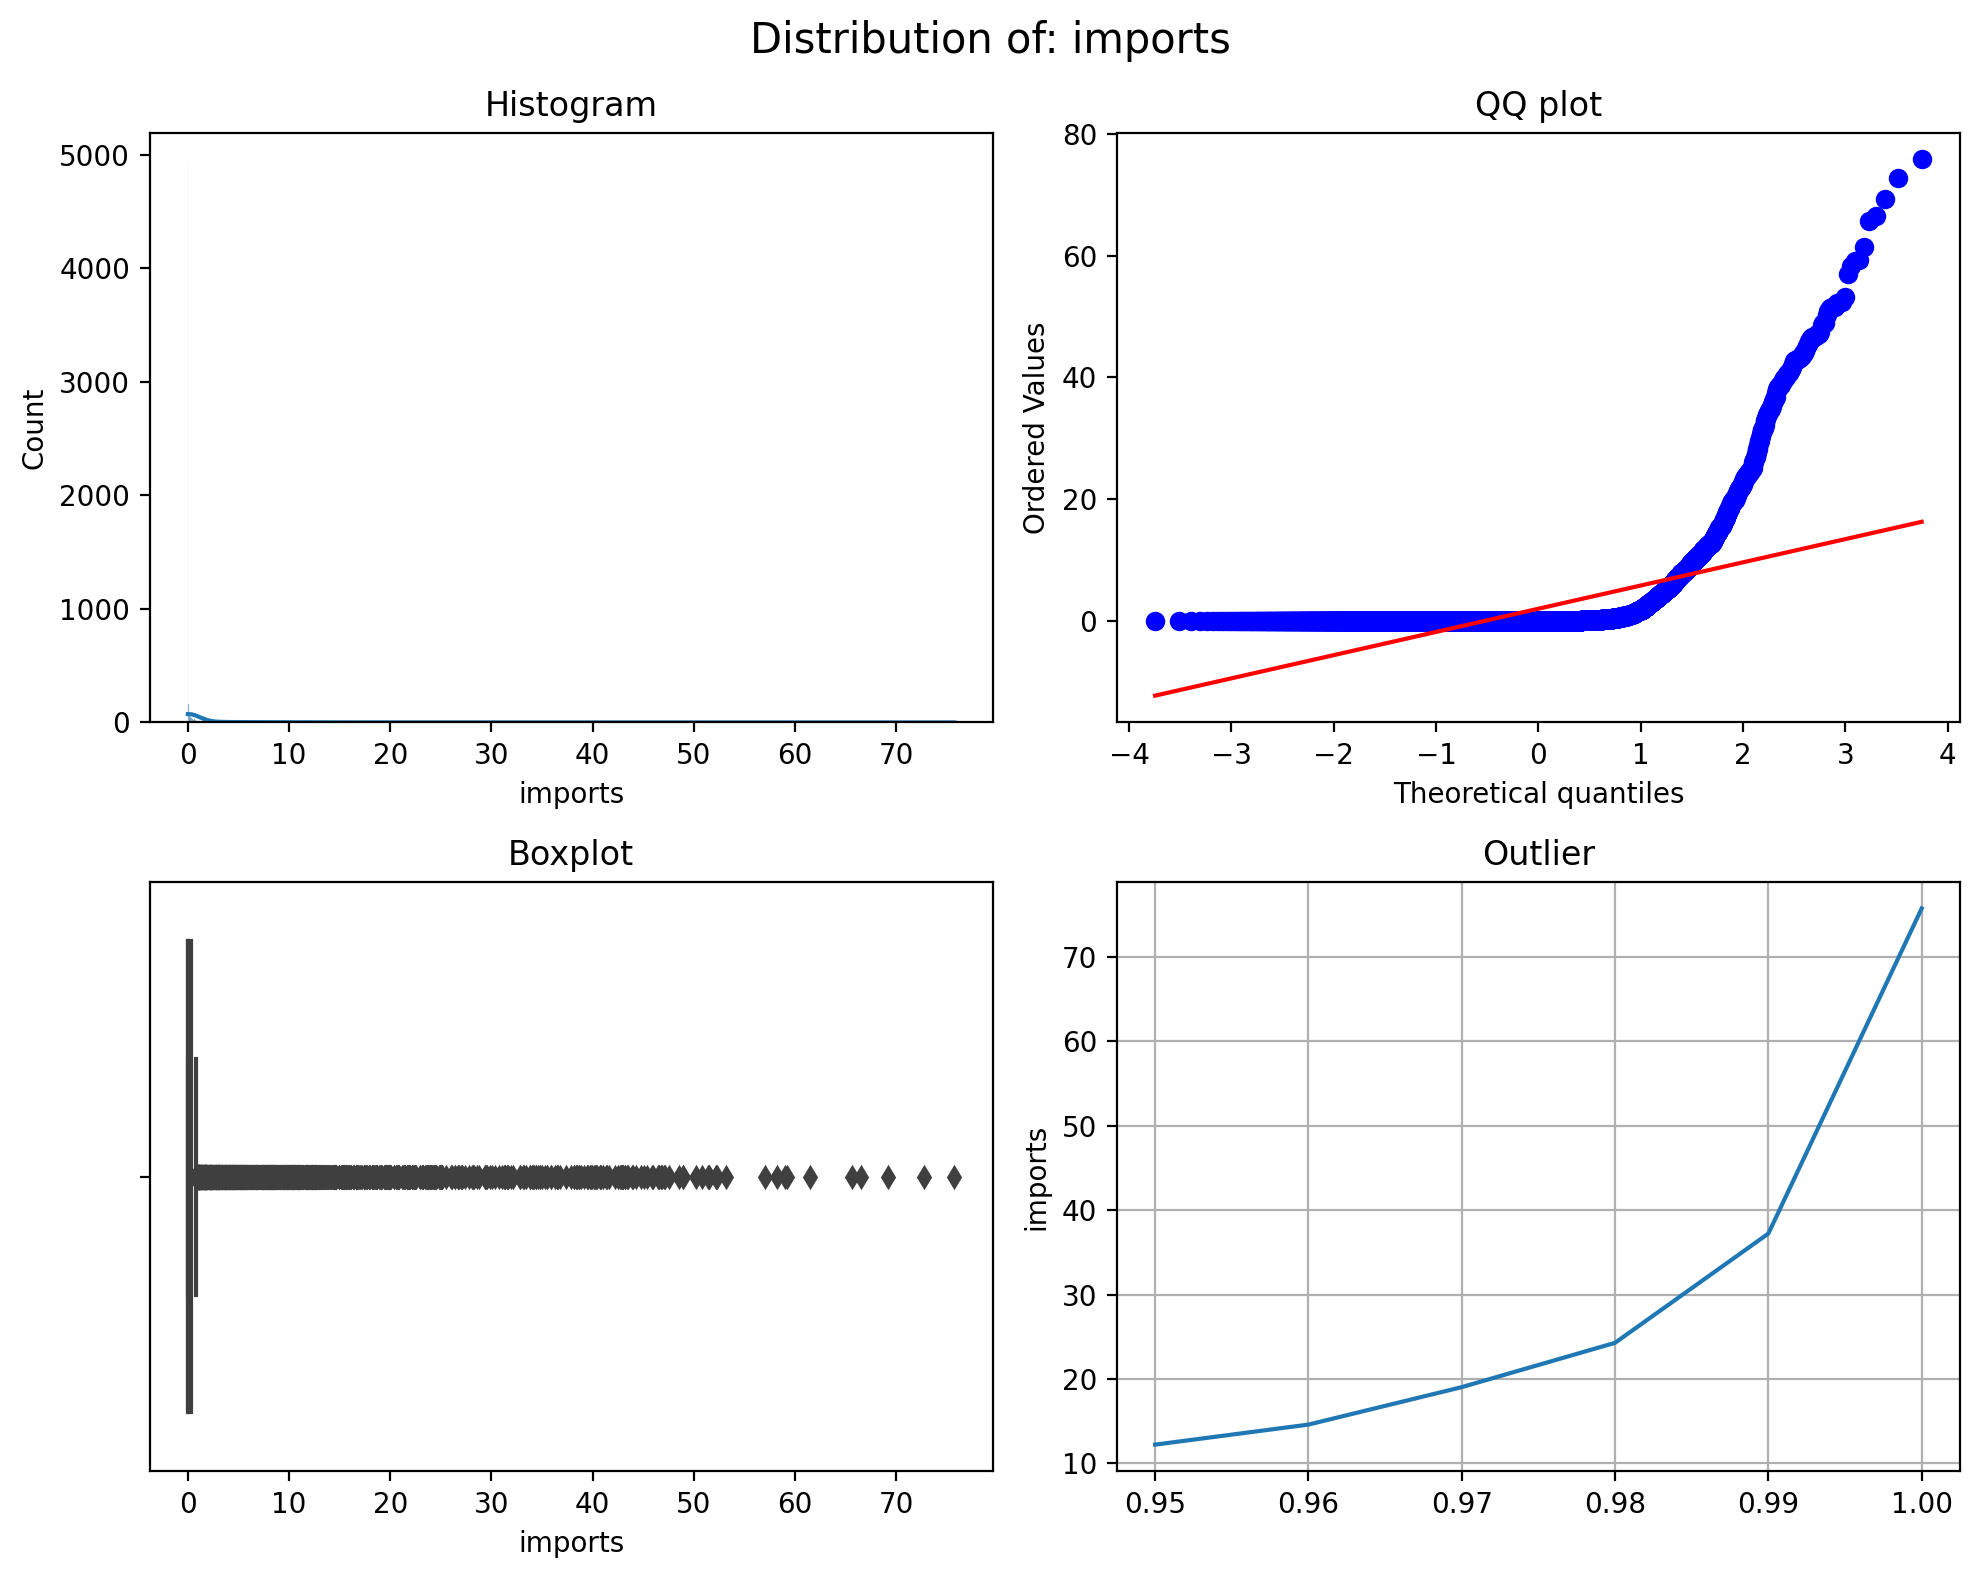

In [14]:
summary_numerical_dist(df_electricity, 'imports', 0.95, 1)

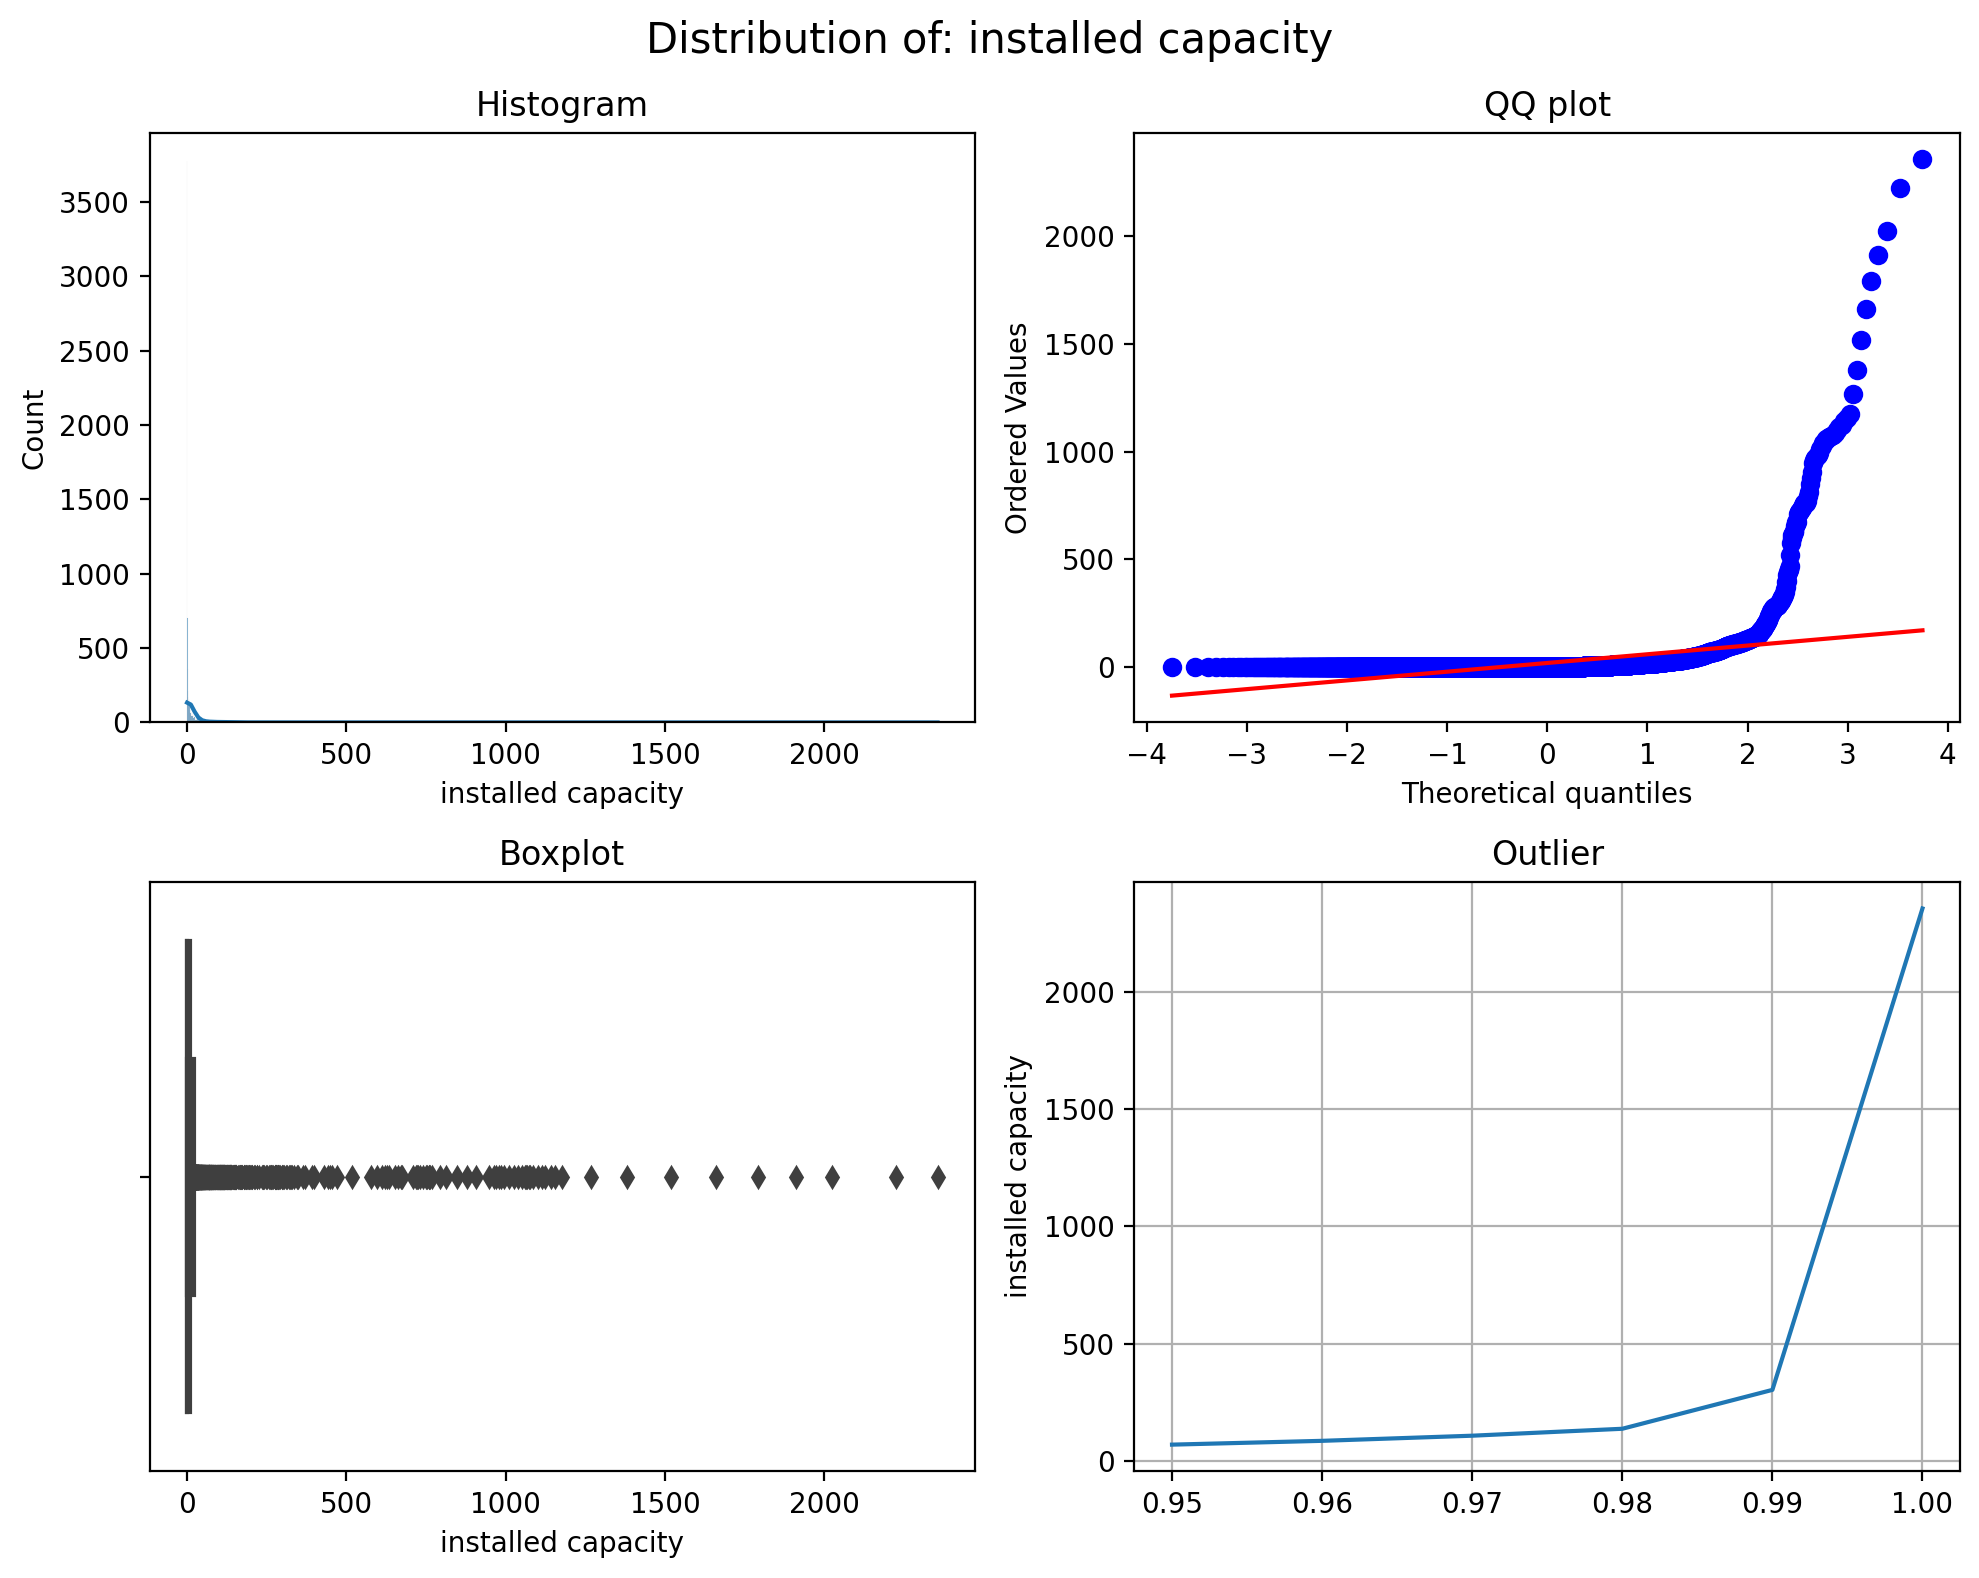

In [15]:
summary_numerical_dist(df_electricity, 'installed capacity', 0.95, 1)

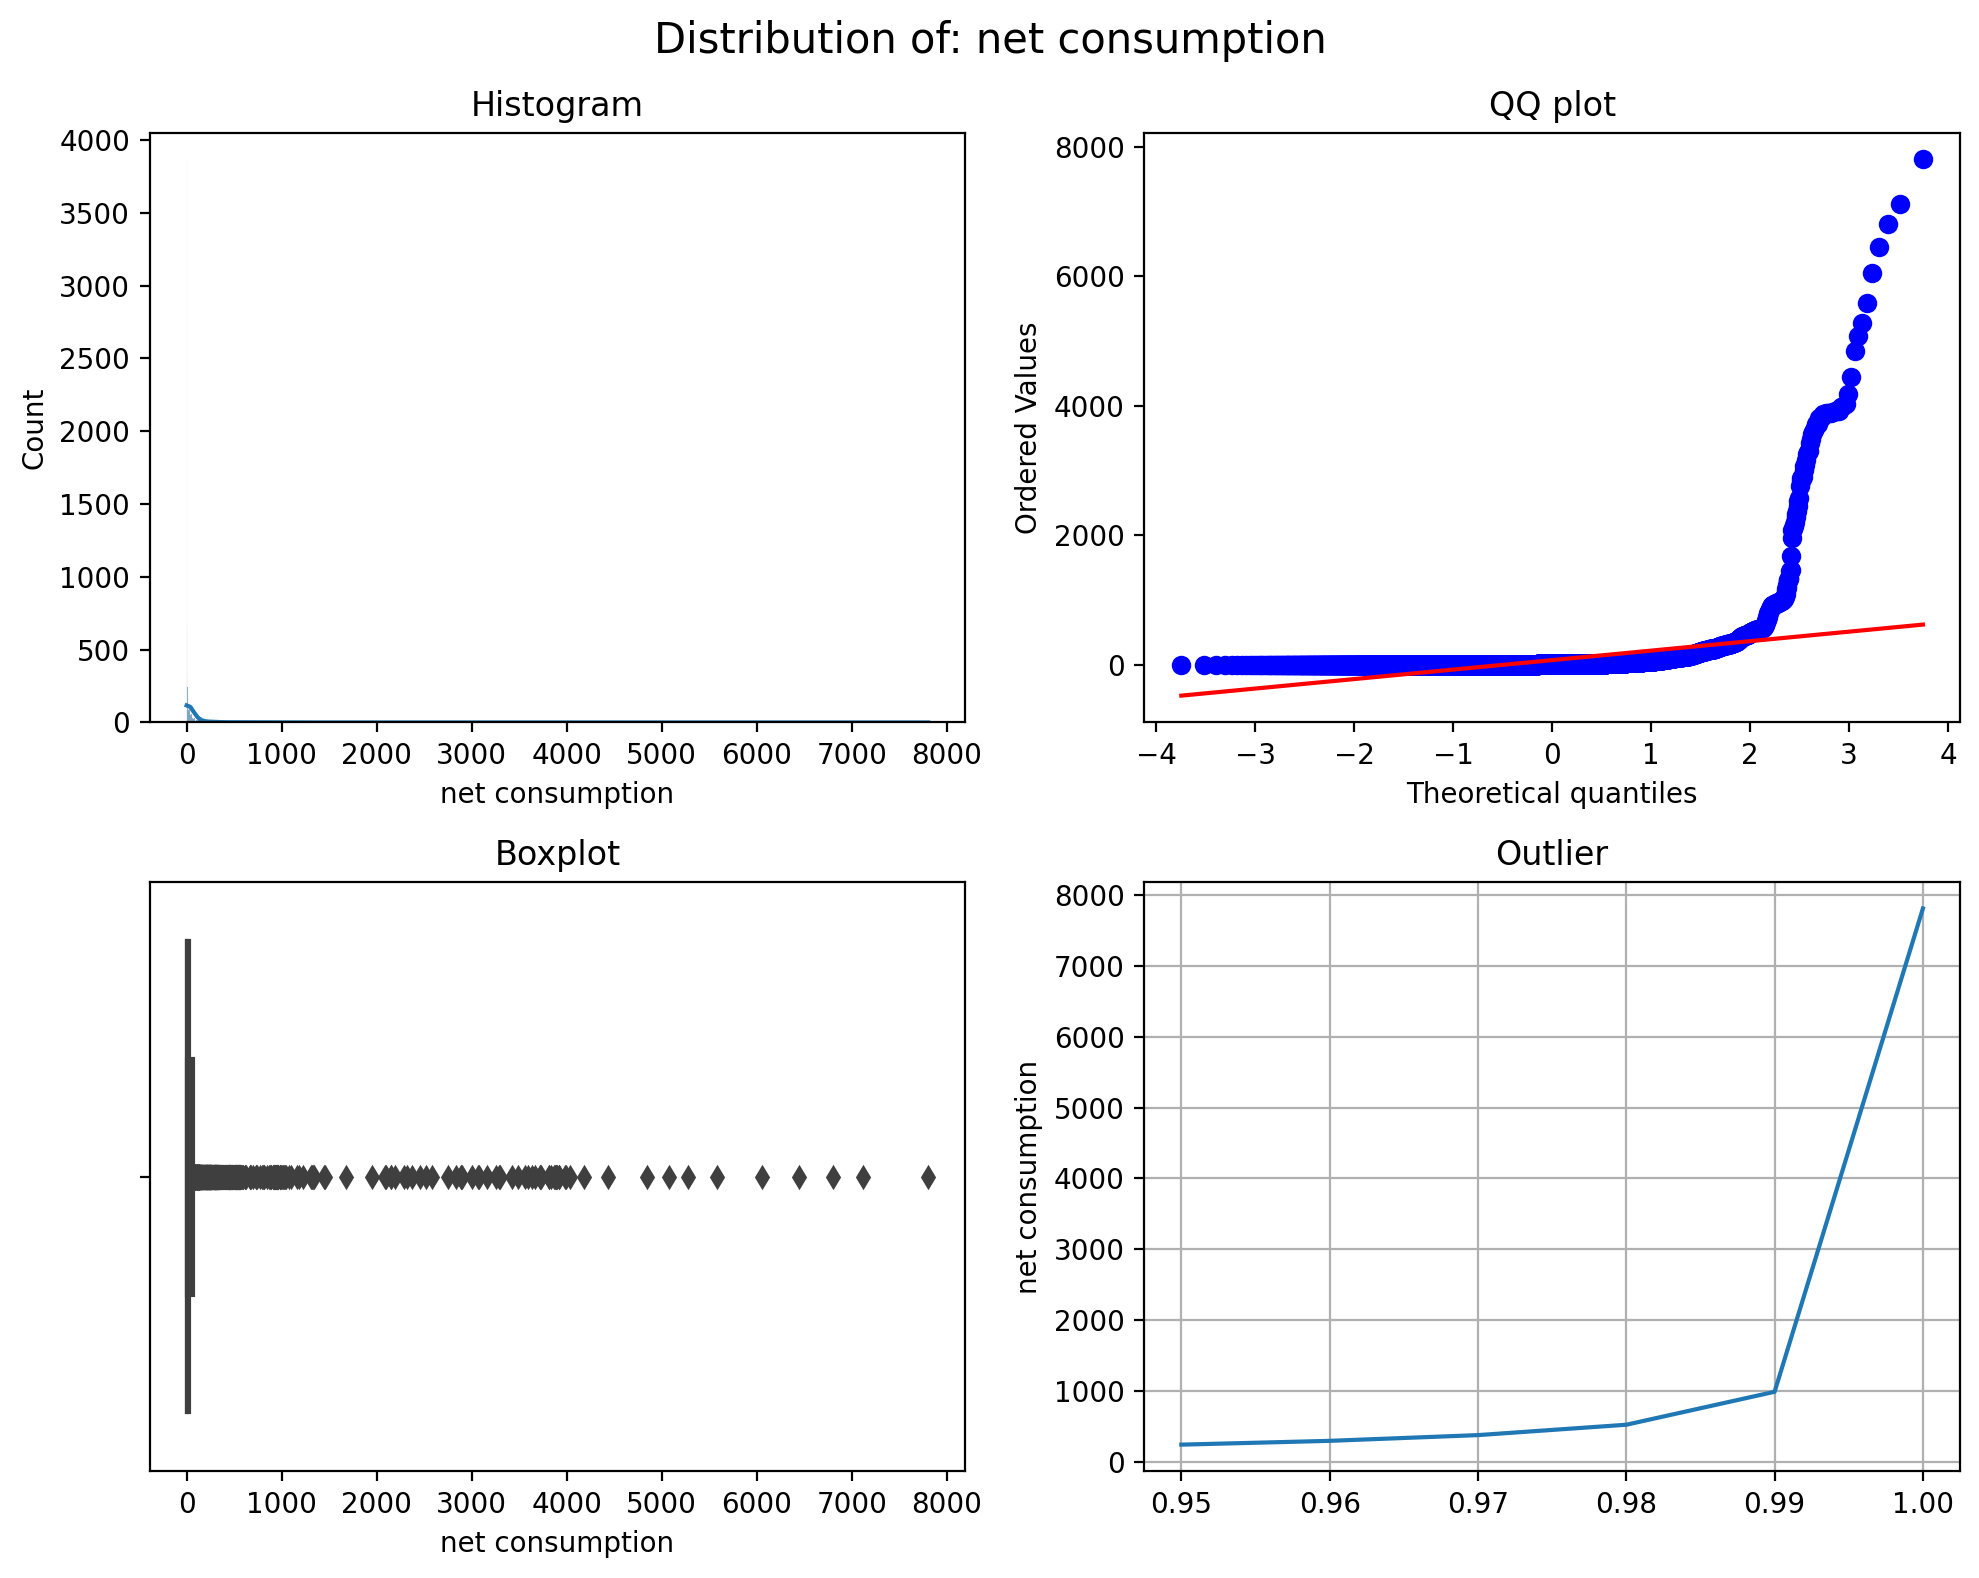

In [16]:
summary_numerical_dist(df_electricity, 'net consumption', 0.95, 1)

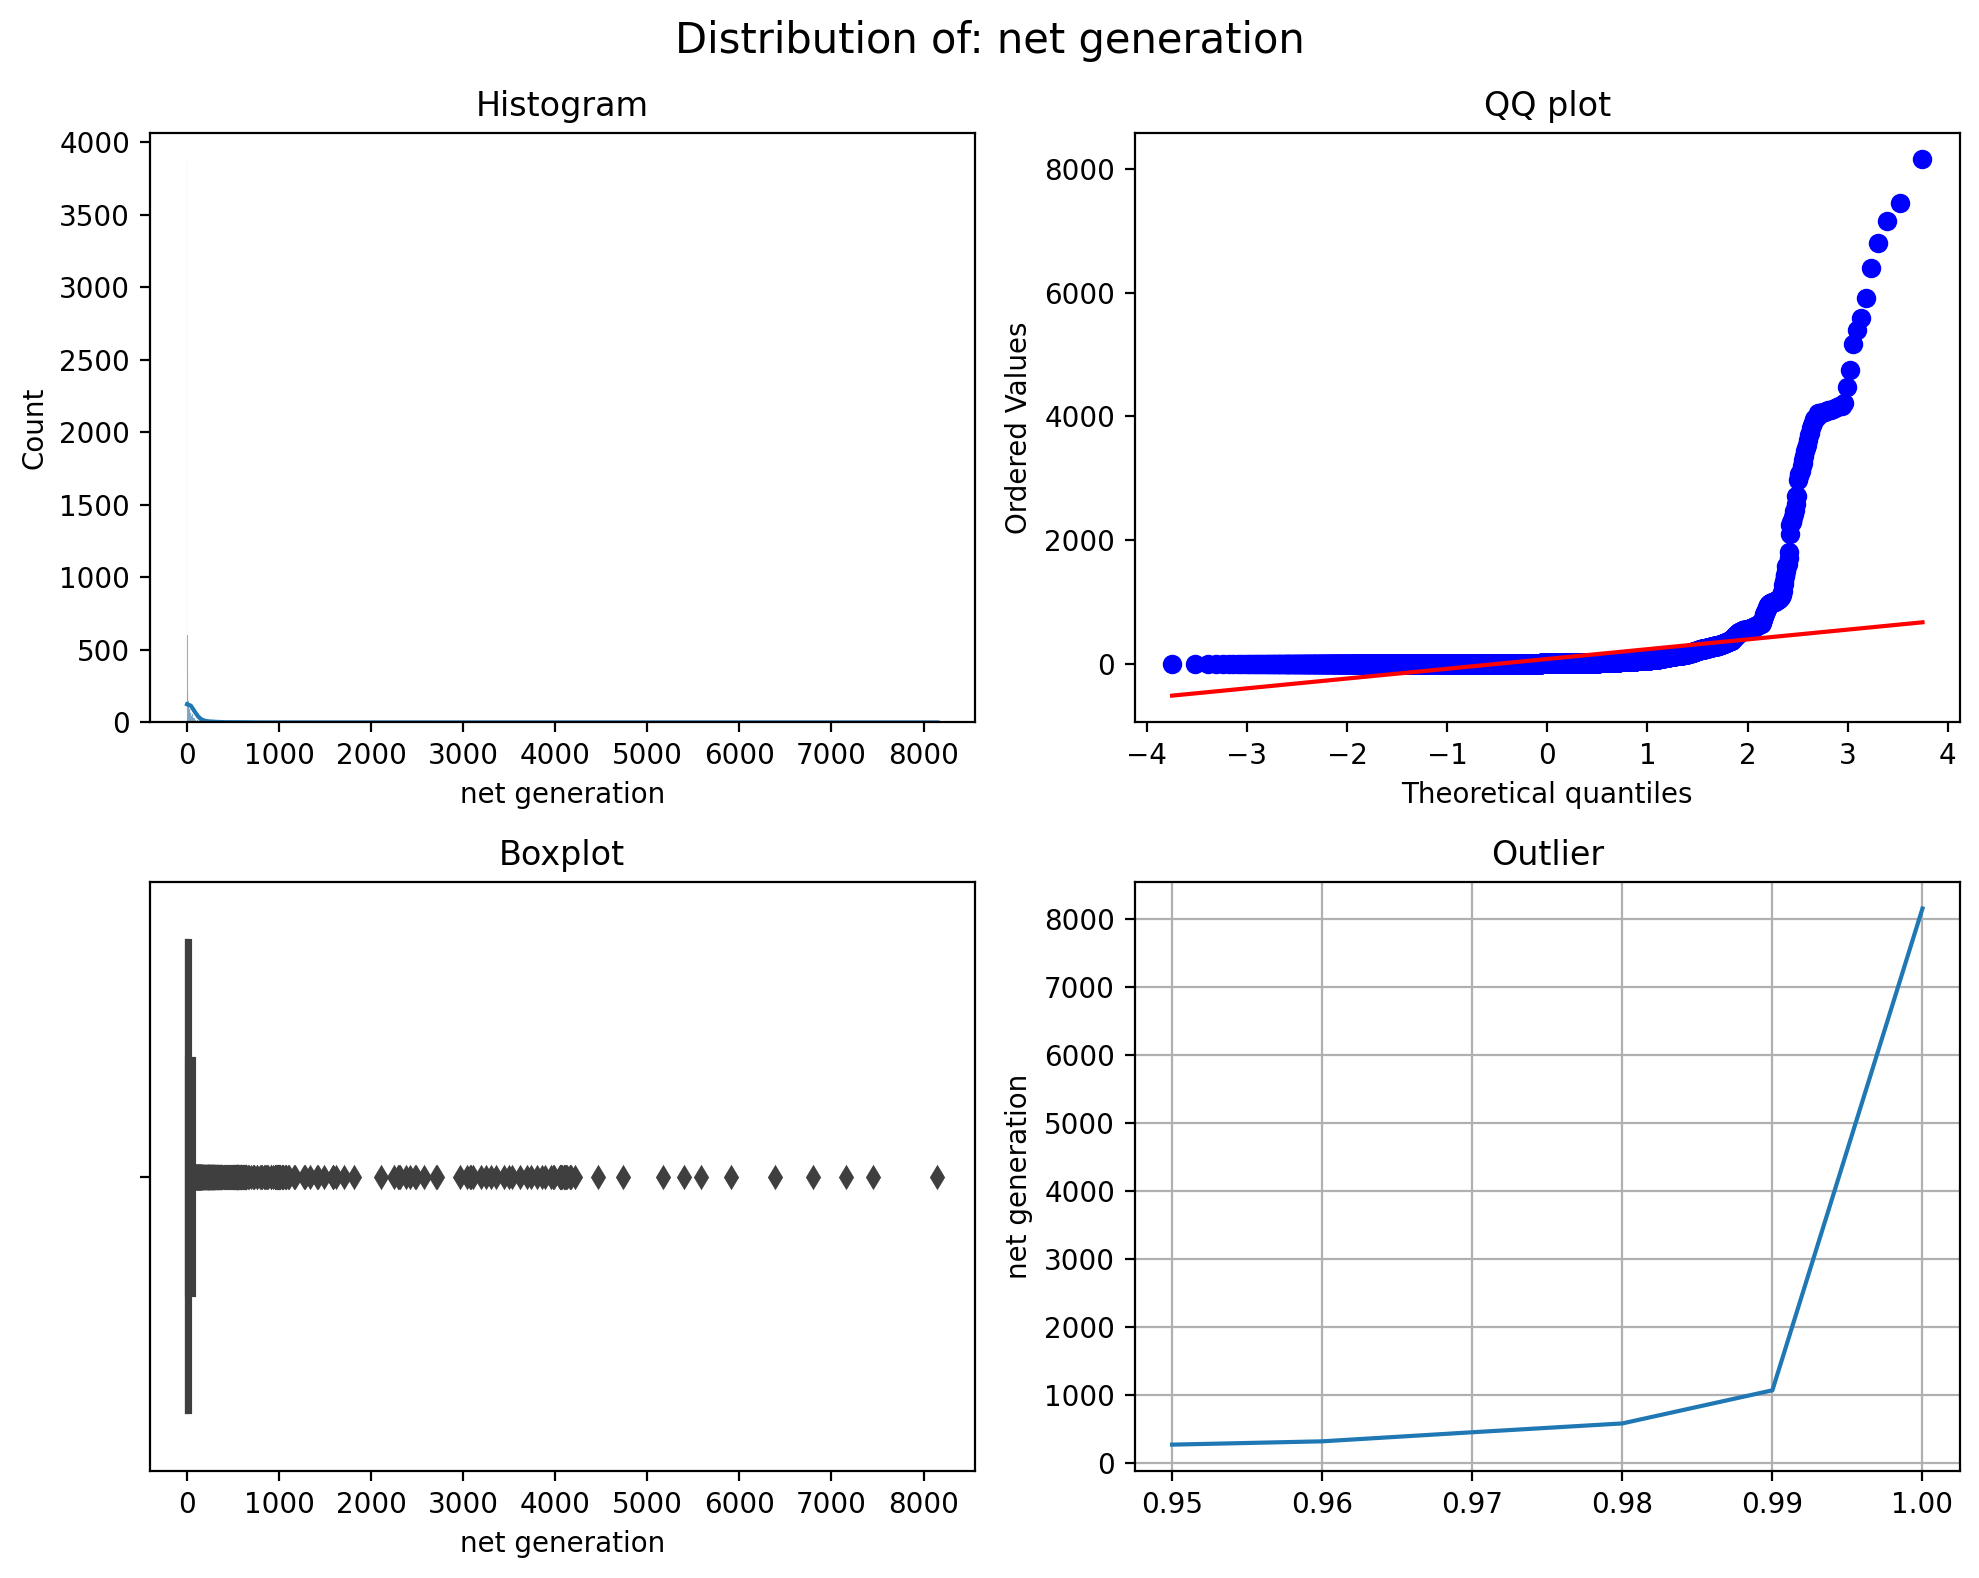

In [17]:
summary_numerical_dist(df_electricity, 'net generation', 0.95, 1)

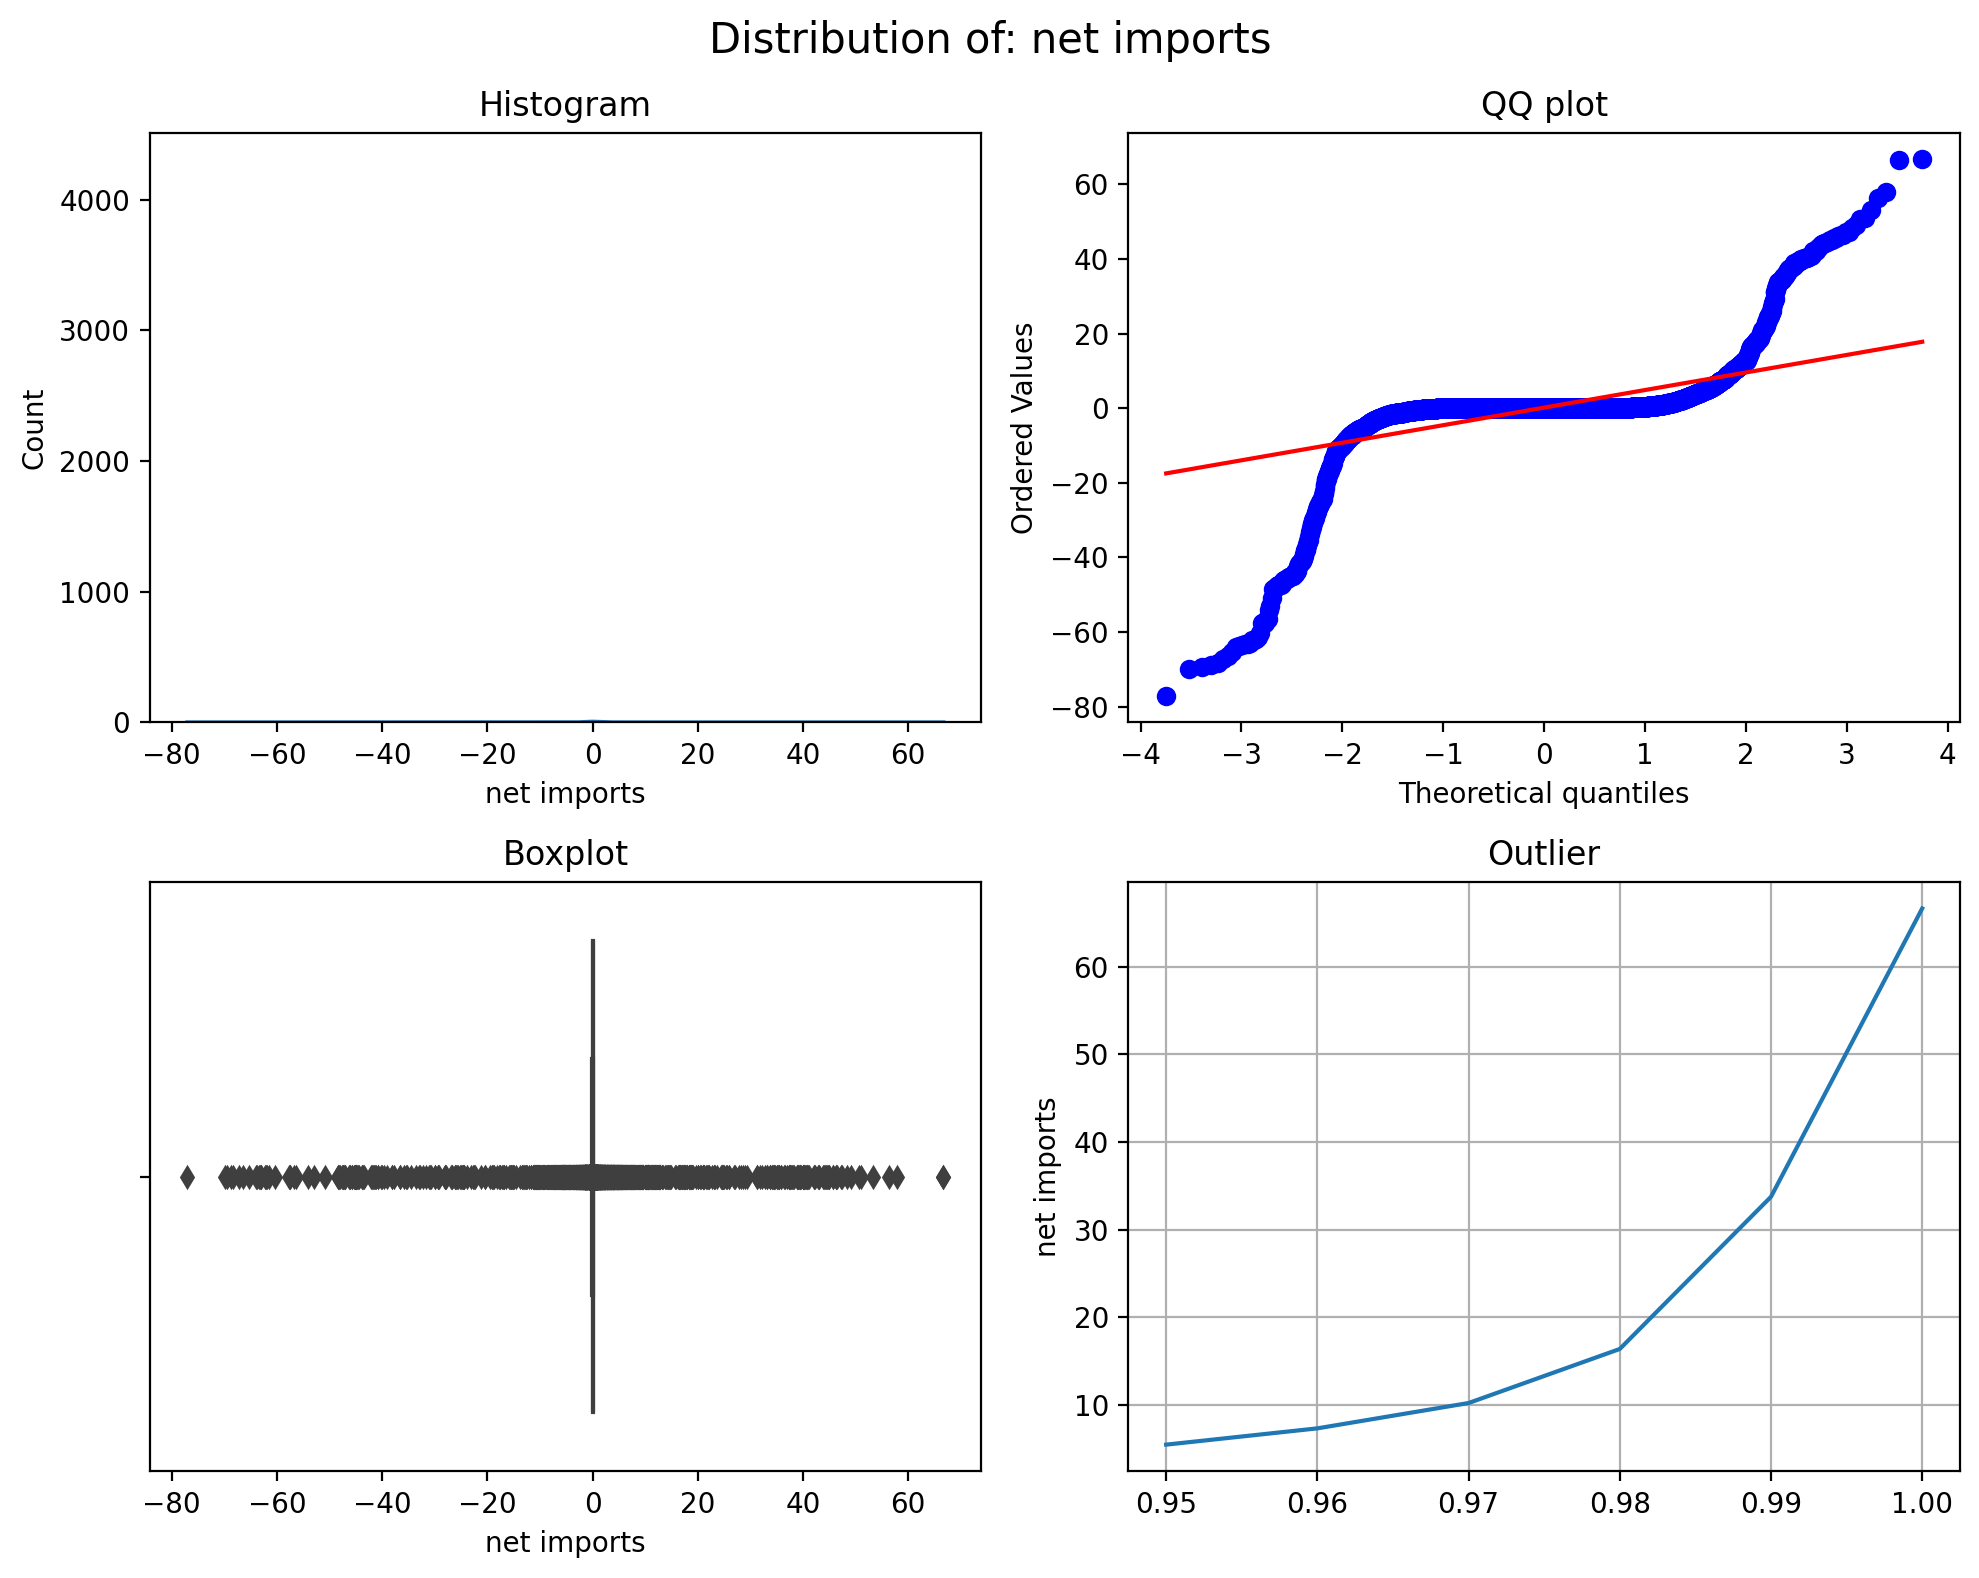

In [18]:
summary_numerical_dist(df_electricity, 'net imports', 0.95, 1)

It can be observed that there are approximately 2 to 5 extreme outliers in the overall data.

The above description is based on an analysis at the national level, and when considering the year as well, it is evident that most of the data is heavily skewed.

## 3.3. Frequency(Categorical)

In [19]:
def summary_categorical_dist(df_data, col):
    
    # plot size
    fig = plt.figure(figsize = (10, 4), facecolor = "white")


    # setting subplot
    layout_plot = (1, 2)
    num_subplot = 2
    axes = [None for _ in range(num_subplot)]

    list_shape_subplot = [
        [(0, 0), (0, 1)], # loc
        [1, 1], # rowspan
        [1, 1] # colspan
    ]

    for i in range(num_subplot):
        axes[i] = plt.subplot2grid(
            layout_plot, list_shape_subplot[0][i],
            rowspan = list_shape_subplot[1][i],
            colspan = list_shape_subplot[2][i]
        )
    
    
    # calculate frequency
    count = df_data[col].value_counts().sort_index()
        
    
    # countplot: axes[0]
    sns.countplot(
        data = df_data,
        y = col,
        ax = axes[0]
    )
    
    
    # pie chart: axes[1]
    axes[1].pie(
        data = df_data,
        x = count,
        labels = count.index,
        autopct = '%1.1f%%',
        startangle = 90
    )
    
    
    # lists
    list_title = ["Counts", "Proportions"]
    
    for i in range(num_subplot):
        # title
        axes[i].set_title(list_title[i])
        
    
    # suptitle
    plt.suptitle(f"Distribution of: {col}", fontsize = 15)
    
    
    # interval adjustment and output
    plt.tight_layout()
    plt.show()

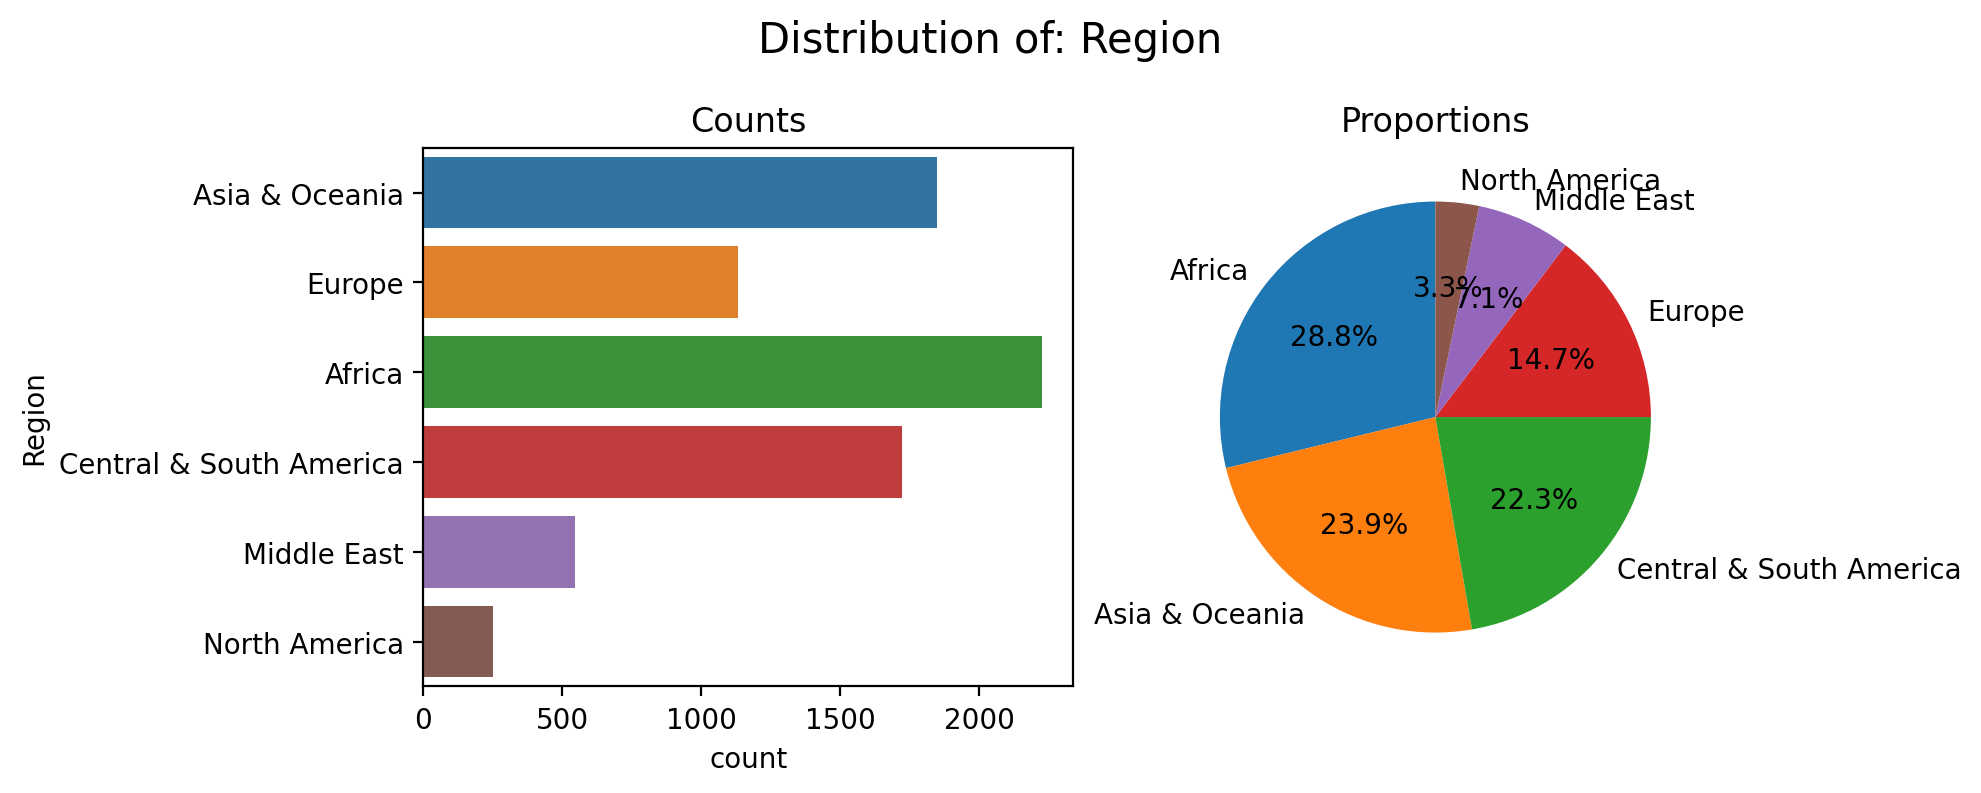

In [20]:
summary_categorical_dist(df_electricity, 'Region')

## 3.4. Relationship

I will consider a derived variable, calculated by dividing electricity loss by electricity consumption, as a key analysis variable.

In [21]:
# derived variable
df_electricity['losses per consumption'] = df_electricity['distribution losses'] / df_electricity['net consumption']

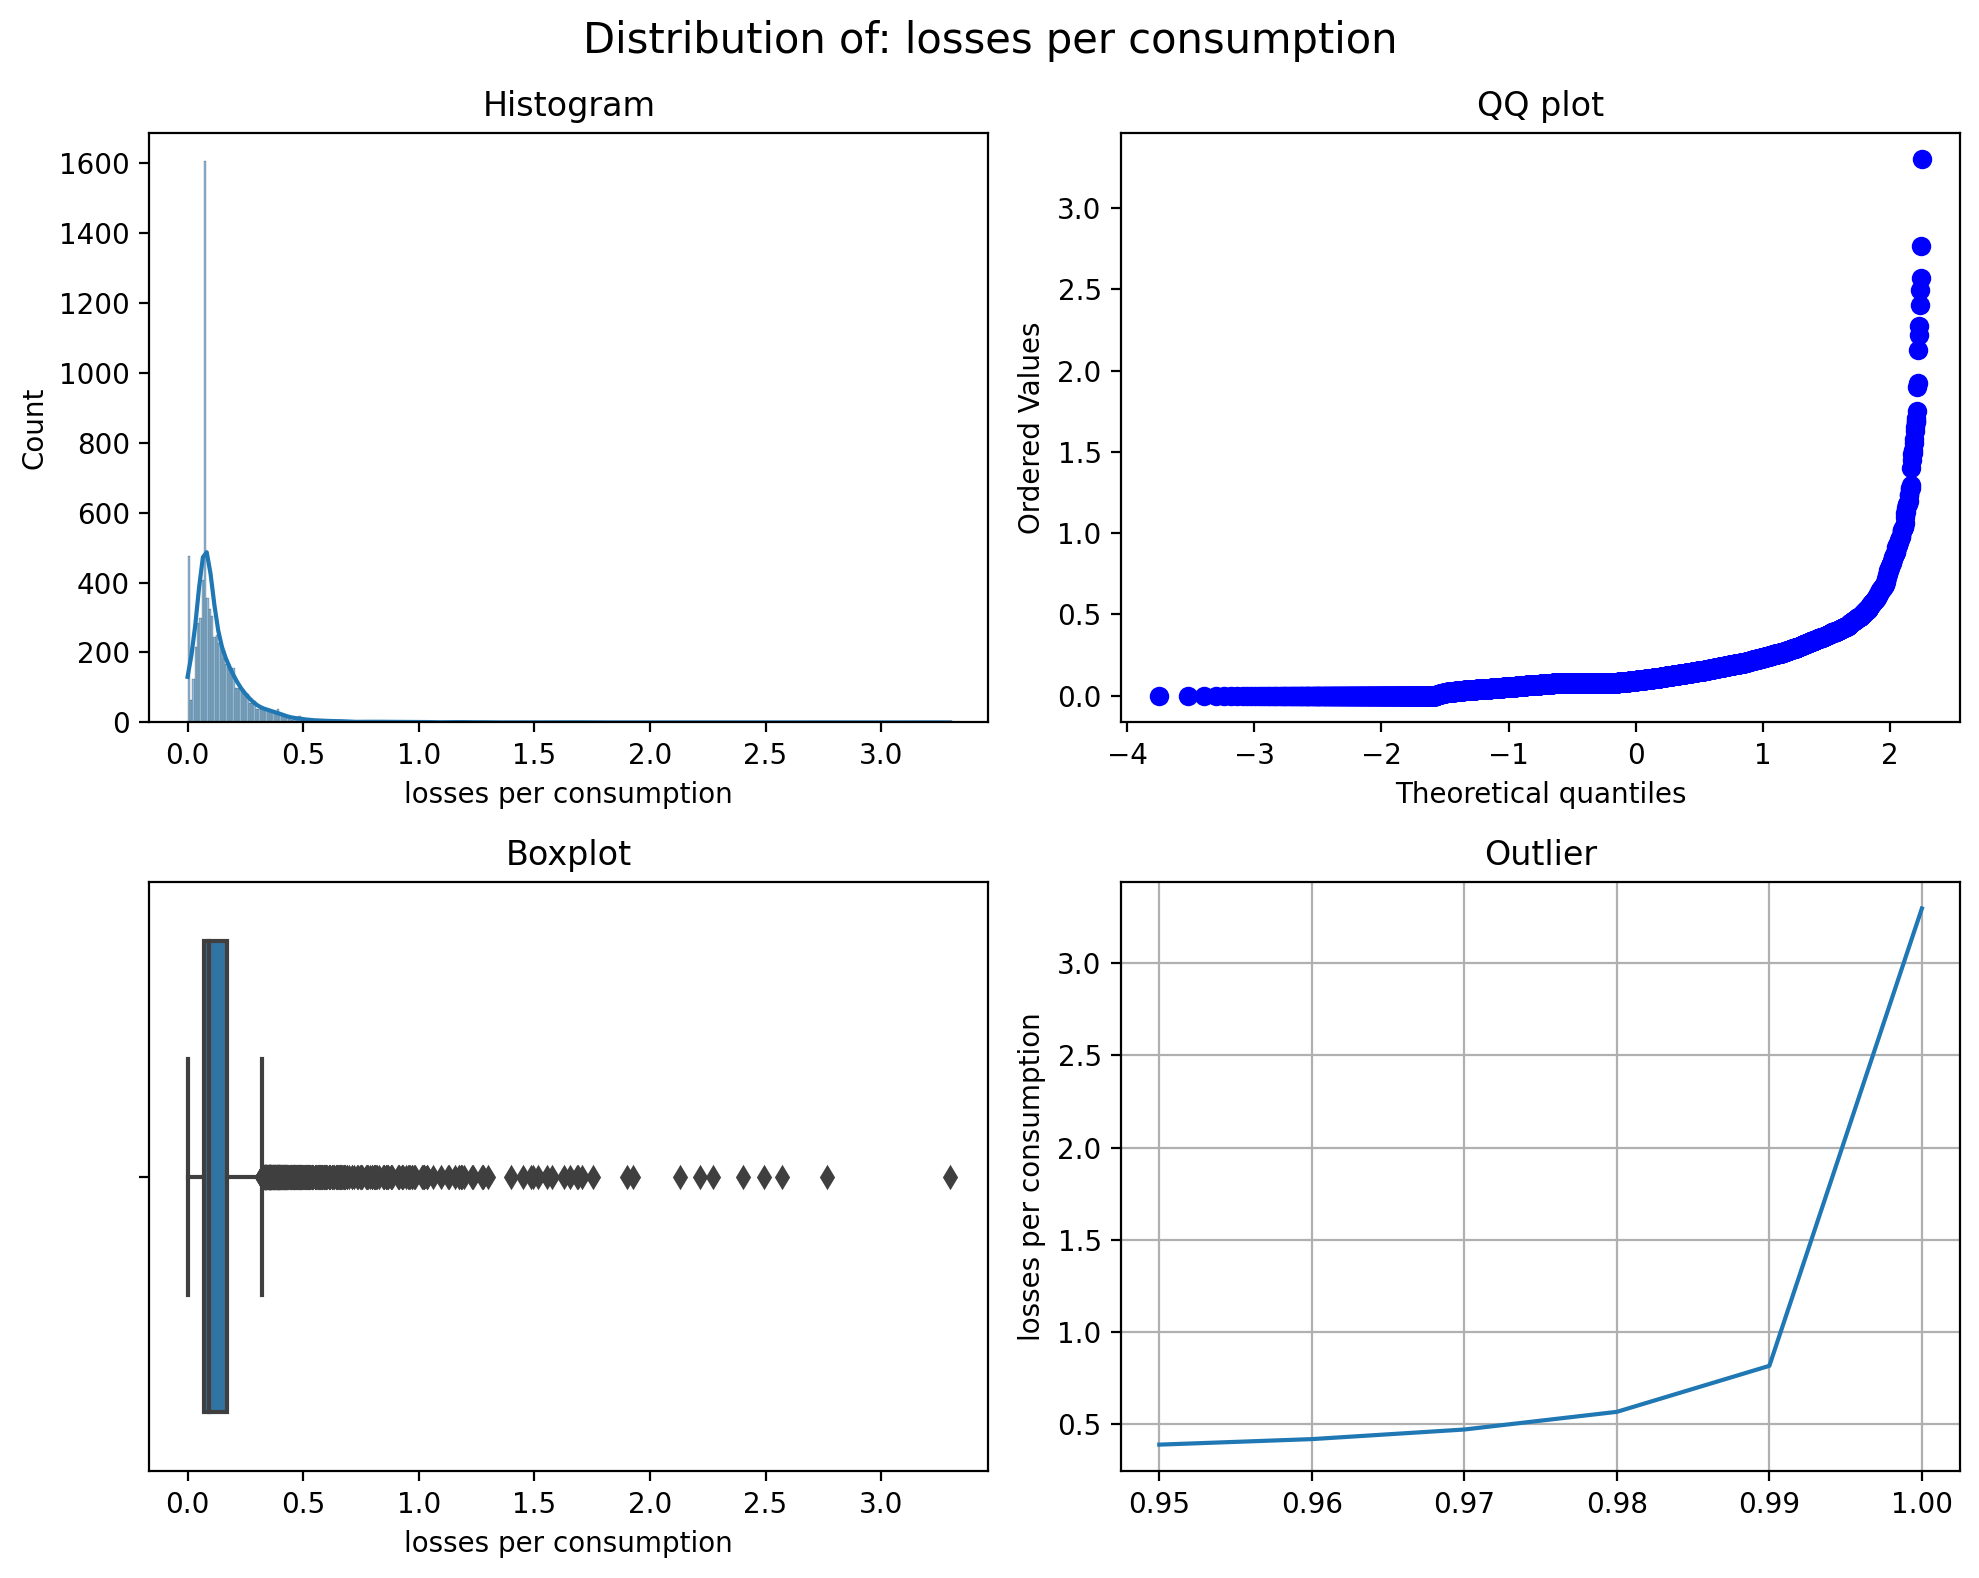

In [22]:
summary_numerical_dist(df_electricity, 'losses per consumption', 0.95, 1)

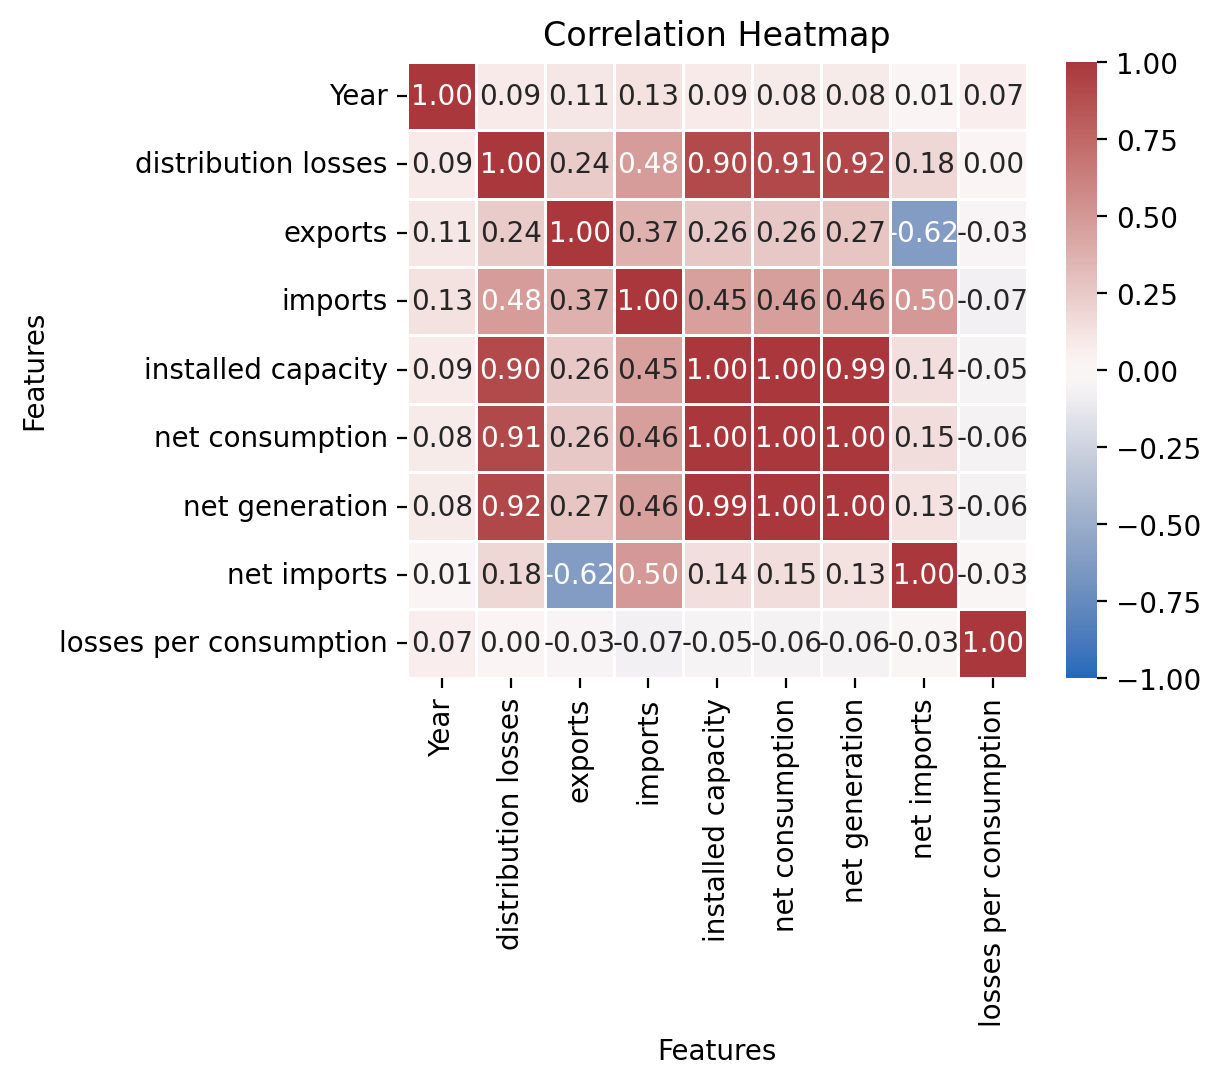

In [23]:
# correlation matrix
plt.figure(figsize = (5, 4), facecolor = "white")

# plotting
sns.heatmap(
    data = df_electricity.corr(numeric_only = True),
    cmap = "vlag",
    vmin = -1, vmax = 1,
    linecolor = "white", linewidth = 0.5,
    annot = True,
    fmt = ".2f"
)

plt.title('Correlation Heatmap')
plt.show()

In [24]:
# df_electricity.nlargest(10, 'losses per consumption')

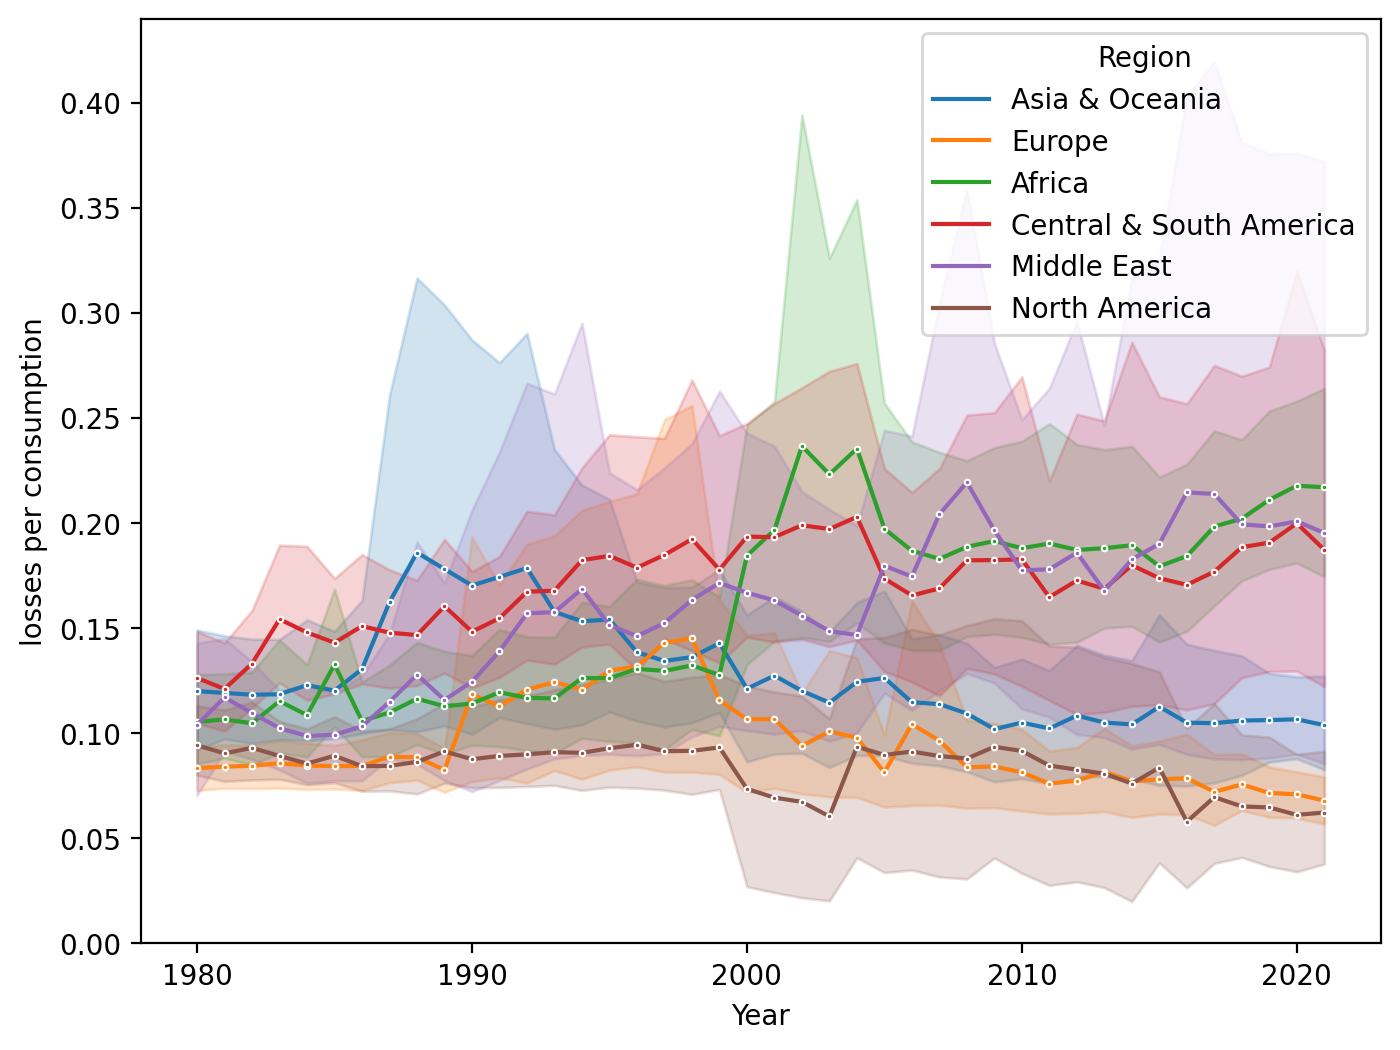

In [25]:
plt.figure(figsize = (8, 6), facecolor = "white")

sns.lineplot(
    data = df_electricity,
    x = "Year", y = "losses per consumption",
    hue = 'Region',
    marker = 'o', markersize = 2
)

plt.show()